## Analisando dados do X (Twitter)

In [2]:
# pip install spacy vaderSentiment pandas
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

path_tweets1 = "../coletas/tweets.csv"
path_tweets2 = "../coletas/tweets2.csv"
# Carrega os tweets de dois arquivos CSV
df1 = pd.read_csv(path_tweets1)
df2 = pd.read_csv(path_tweets2, header=None)
df2.columns = ['tweets']

df = pd.concat([df1[['tweets']], df2], ignore_index=True)

# Inicializa o VADER
analyzer = SentimentIntensityAnalyzer()

# Aplica análise de sentimentos
def analisar_sentimento(texto):
    return analyzer.polarity_scores(str(texto))['compound']

def classificar(score):
    if score >= 0.05:       # Limite para positivo
        return 'positive'
    elif score <= -0.05:    # Limite para negativo
        return 'negative'
    else:
        return 'neutral'

df['compound_score'] = df['tweets'].apply(analisar_sentimento)
df['sentiment'] = df['compound_score'].apply(classificar)
df.to_csv("../coletas/tweets_com_sentimento.csv", index=False)
df[['tweets', 'compound_score', 'sentiment']]


,tweets,compound_score,sentiment
0,She fabricated trump prosecution and had no pr...,-0.9327,negative
1,She's in jail and Diddy did pretty much the sa...,0.5983,positive
2,"oh, and diddy was not guilty as well. happy su...",0.6391,positive
3,If there was no list then why did Epstein SUPP...,-0.9801,negative
4,"Play 🤥, you guilty for knowing. Crying because...",-0.8074,negative
...,...,...,...
191,The idea was to prosecute the perps instead we...,-0.6288,negative
192,Diddy found guilty of giving prostitutes on du...,-0.8020,negative
193,The jury deliberating on Diddy’ fate returned ...,0.1109,positive
194,Diddy juror points to where defense ‘poked hol...,-0.0360,neutral


Finalizando análise dos tweets

In [4]:
# Calcula a média dos compound_scores
media_compound = df['compound_score'].mean()

# Cria um DataFrame com essa média
df_mean = pd.DataFrame({
    'Média Final': [media_compound],
    'Sentimento Final': [classificar(media_compound)]
})

# Exibe o resultado
print("Média dos scores compostos:")
display(df_mean)


Média dos scores compostos:


,Média Final,Sentimento Final
0,-0.216454,negative


## Analisando dados de notícias

In [5]:
# pip install spacy vaderSentiment pandas
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

path_artigo = "../coletas/diddy_articles.csv"
# Carrega os tweets de dois arquivos CSV
df_articles = pd.read_csv(path_artigo)

# Inicializa o VADER
analyzer = SentimentIntensityAnalyzer()

# Aplica análise de sentimentos
def analisar_sentimento(texto):
    return analyzer.polarity_scores(str(texto))['compound']

def classificar(score):
    if score >= 0.05:       # Limite para positivo
        return 'positive'
    elif score <= -0.05:    # Limite para negativo
        return 'negative'
    else:
        return 'neutral'

df_articles['compound_score'] = df_articles['text'].apply(analisar_sentimento)
df_articles['sentiment'] = df_articles['compound_score'].apply(classificar)
df_articles.to_csv("../coletas/tweets_com_sentimento.csv", index=False)
df_articles[['text', 'compound_score', 'sentiment']]


,text,compound_score,sentiment
0,"Sean “Diddy” Combs, the onetime global hip-hop...",-0.9986,negative
1,"Sean ""Diddy"" Combs reacts to being convicted o...",-0.9476,negative
2,"Updated on: July 2, 2025 / 10:43 PM EDT/ CBS N...",-0.9991,negative
3,Sean “Diddy” Combs was denied bail on Wednesda...,-0.9997,negative
4,"The trial of American music mogul Sean ""Diddy""...",-0.9987,negative
5,Music mogul Sean “Diddy” Combs was found guilt...,-0.9995,negative
6,"After the verdict, a judge denied Combs bail. ...",-0.9995,negative
7,The rap mogul was denied bail after he was fou...,-0.9977,negative


In [7]:
# Calcula a média dos compound_scores
media_compound = df_articles['compound_score'].mean()

# Cria um DataFrame com essa média
df_mean_articles = pd.DataFrame({
    'Média Final': [media_compound],
    'Sentimento Final': [classificar(media_compound)]
})

# Exibe o resultado
print("Média dos scores compostos:")
display(df_mean_articles)


Média dos scores compostos:


,Média Final,Sentimento Final
0,-0.99255,negative


## Analisando a Nuvem de Palavras

In [8]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


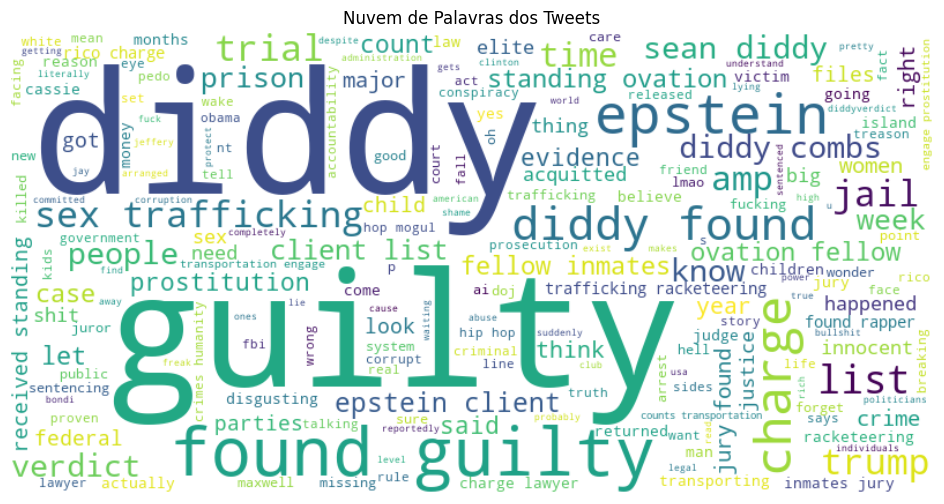

In [ ]:

import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carrega modelo do spaCy
nlp = spacy.load("en_core_web_sm")
coluna_texto = df.columns[0] if df.columns[0].lower() in ['text', 'tweets', 'content'] else df.columns[0]
textos = df[coluna_texto].astype(str).str.cat(sep=' ')

# Processa com spaCy
doc = nlp(textos.lower())

# Filtra apenas palavras relevantes
tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]


# Junta para nuvem de palavras
texto_filtrado = ' '.join(tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_filtrado)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras dos Tweets")
plt.show()

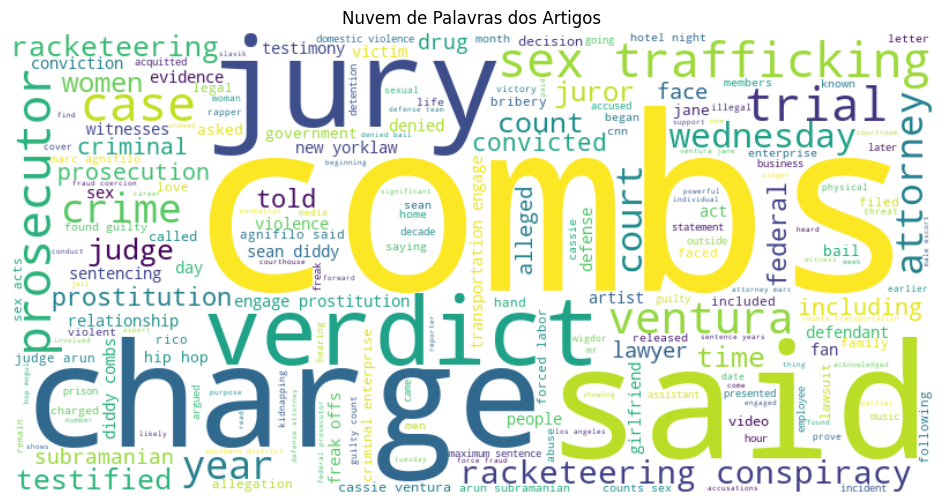

In [ ]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carrega modelo do spaCy
nlp = spacy.load("en_core_web_sm")

# Corrige verificação da coluna de texto
coluna_texto = None
for col in df_articles.columns:
    if col.lower() == 'text':
        coluna_texto = col
        break
if not coluna_texto:
    coluna_texto = df_articles.columns[1]  # Usa a segunda coluna como fallback

# Concatena os textos
textos = df_articles[coluna_texto].astype(str).str.cat(sep=' ')

# Processa com spaCy
doc = nlp(textos.lower())
tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
texto_filtrado = ' '.join(tokens)

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_filtrado)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras dos Artigos")
plt.show()
